In [1]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from math import pi
import plancklens
from plancklens import utils, n0s
from plancklens import nhl
from plancklens.n1 import n1
from plancklens import qest, qecl, qresp
import matplotlib as mpl

from orphics import maps, cosmology
mpl.rcParams['font.size']=12

In [2]:
exps_config = {
    'CMB_S3': {
        'nlev_t': 7,
        'nlev_p':7*2**0.5,
        'beam_arcmin': 1.4,
        'result_nums': [0, 20, 40, 60, 80]
    },
    'CMB_S4': {
        'nlev_t': 1,
        'nlev_p':2**0.5,
        'beam_arcmin': 1.4,
        'result_nums': [90, 110, 130, 150, 170]
    }
}

In [3]:
A_cb = 1e-08
experiment = 'CMB_S4'

lmax = 3000
ellmin = 30
ellmax = 3000
Lmax = 3000

ls = np.arange(lmax+1)
ells = np.arange(ellmax+1)

In [4]:
theory = cosmology.default_theory()
cltt, clee, clbb = theory.lCl('TT', ls), theory.lCl('EE', ls), theory.lCl('BB', ls)
clte = theory.lCl('TE', ls)

In [5]:
nltt = (exps_config[experiment]['nlev_t']*\
        pi/180/60)**2/maps.gauss_beam(ls, exps_config[experiment]['beam_arcmin'])**2
nlee = (exps_config[experiment]['nlev_p']*\
        pi/180/60)**2/maps.gauss_beam(ls, exps_config[experiment]['beam_arcmin'])**2
nlbb = nlee

ocltt = cltt + nltt
oclee = clee + nlee
oclbb = clbb + nlbb
oclee[0], oclee[1], oclbb[0], oclbb[1] = 1, 1, 1, 1

In [6]:
ftl = 1/ocltt[:lmax+1]
fel = 1/oclee[:lmax+1]
fbl = 1/oclbb[:lmax+1]

# ftl[:ellmin] *= 0.
# fel[:ellmin] *= 0.
# fbl[:ellmin] *= 0.

ftl[:2] *= 0.
fel[:2] *= 0.
fbl[:2] *= 0.

In [16]:
cls_weights = {'tt':cltt,'ee':clee, 'bb':clbb,'te':clte}
cls_ivfs = {'tt':ftl, 'ee': fel, 'bb':fbl}

In [17]:
R = qresp.get_response('p_eb', 3000, 'p', cls_weights, cls_weights, cls_ivfs)

/tmp/ipykernel_82818/2051909994.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/N0[0],label='%s' %experiment)


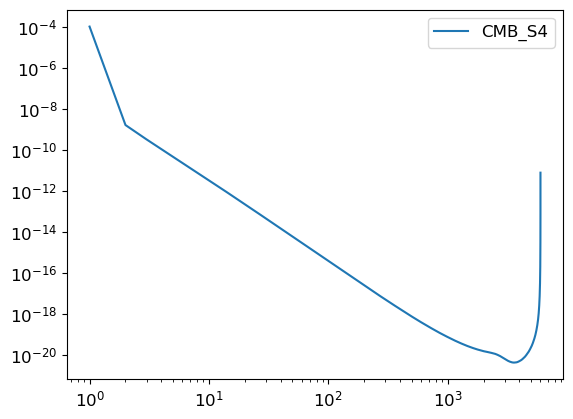

In [28]:
plt.plot(1/N0[0],label='%s' %experiment)

plt.xscale('log')
plt.yscale('log')
plt.legend()